## Maps

Draw a CCG map, optionally with London separated out.

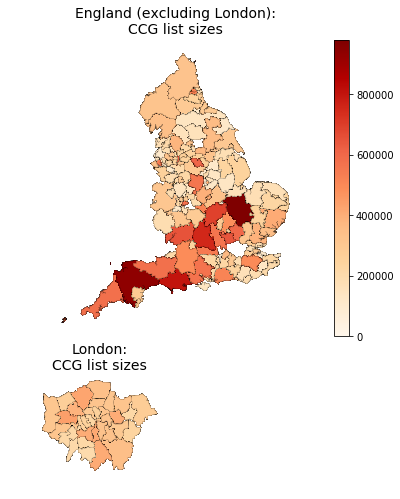

In [6]:
import numpy as np
import pandas as pd
from ebmdatalab import maps

plt.figure(figsize=(12,8))
df = pd.read_json('ccg_list_size.json')
df.columns = ['date', 'pct', 'ccg_name', 'total_list_size']  # The CCG column must be named 'pct'
plt = maps.ccg_map(df, title="CCG list sizes", column='total_list_size', separate_london=True)
plt.show()

You can also show the map as a cartogram where the CCGs are sized according to their patient population

/home/seb/.local/share/virtualenvs/jupyter/local/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


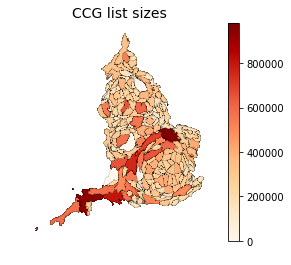

In [7]:
plt = maps.ccg_map(df, title="CCG list sizes", column='total_list_size', cartogram=True, separate_london=False)
plt.show()

## Deciles

Given a dataframe with a date column and a values column, compute
percentiles for each date and plot them in a line chart.

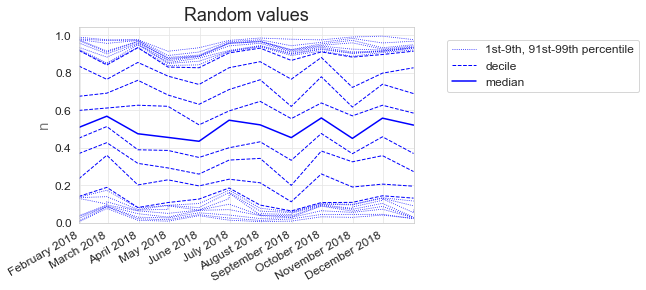

In [13]:
from ebmdatalab import charts
import matplotlib.gridspec as gridspec

import importlib
importlib.reload(charts)

# make a datafrom with a date column and a values column
df = pd.DataFrame(np.random.rand(1000, 1), columns=['val'])
months = pd.date_range('2018-01-01', periods=12, freq='M')
df['month'] = pd.to_datetime(np.random.choice(months, len(df)))

charts.deciles_chart(
        df,
        period_column='month',
        column='val',
        title="Random values",
        ylabel="n",
        show_outer_percentiles=True,
        show_legend=True
)

# Now add a single line against the deciles
df_subject = pd.DataFrame(np.random.rand(12, 1), columns=['val']) * 100
df_subject['month'] = months
df_subject.set_index('month')

plt.plot(df_subject['month'], df_subject['val'], 'r--')
plt.show()


